# Backpropagation in Multilayer Neural Networks

Diving deep: implement a real gradient descent in `Numpy`

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")
import numpy as np
from functools import reduce

def plot_prediction(model, sample_idx=0, classes=range(10)):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0.imshow(scaler.inverse_transform(X_test[sample_idx]).reshape(8, 8), cmap=plt.cm.gray_r,
               interpolation='nearest')
    ax0.set_title("True image label: %d" % y_test[sample_idx]);


    ax1.bar(classes, one_hot(len(classes), y_test[sample_idx]), label='true')
    ax1.bar(classes, model.forward(X_test[sample_idx]), label='prediction', color="red")
    ax1.set_xticks(classes)
    prediction = model.predict(X_test[sample_idx])
    ax1.set_title('Output probabilities (prediction: %d)'
                  % prediction)
    ax1.set_xlabel('Digit class')
    ax1.legend()

## Dataset
- [sklearn.datasets.load_digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
N = reduce(lambda x,y: x*y,digits.images[0].shape)
print("Image dimension : N=%d"%N)
K = len(set(digits.target))
print("Number of classes : K=%d"%K)

Image dimension : N=64
Number of classes : K=10


### Example

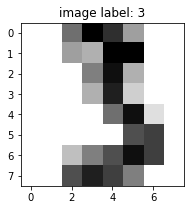

In [3]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- Normalization
- Train / test split

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
print("Data dimension and type")
print("X_train : " + str(X_train.shape) + ", " +str(X_train.dtype))
print("y_train : " + str(y_train.shape) + ", " +str(y_train.dtype))
print("X_test : " + str(X_test.shape) + ", " +str(X_test.dtype))
print("y_test : " + str(y_train.shape) + ", " +str(y_train.dtype))

Data dimension and type
X_train : (1527, 64), float32
y_train : (1527,), int32
X_test : (270, 64), float32
y_test : (1527,), int32


## Utils Function

Write utils function that will be used later

### One-hot encoding function

$$
OneHotEncoding(4,N_{class}=K) = 
\begin{bmatrix}
  0\\
  0\\
  0\\
  0\\
  1\\
  0\\
  0\\
  0\\
  0\\
  0\\
\end{bmatrix}
$$

**Exercise :** Implement the **one hot encoding** function of an integer array for a fixed number of classes (similar to keras' `to_categorical`):  
Ensure that your function works for several vectors at a time.  

In [6]:
# Write here the one_hot function
def one_hot(y, n_classes):
    ##
    return ohy

In [7]:
# %load solutions/one_hot_encoding.py
def one_hot(n_classes, y):
    ohy = np.eye(n_classes)[y]
    return ohy

Make sure the solution works on 1D array :

In [8]:
ohy = one_hot(y=3,n_classes=10)
print("Expected : array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]) \n")
print("Computed  :" + str(ohy))

Expected : array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]) 

Computed  :[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Make sure the solution works on 2D array :

In [9]:
ohY = one_hot(n_classes=10, y=[0, 4, 9, 1])
print("Expected : [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] \n [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] \n  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] \n  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]")
print("Computed  :" + str(ohY))

Expected : [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Computed  :[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### The softmax function

$$
softmax(\mathbf{x}) = \frac{1}{\sum_{i=1}^{n}{e^{x_i}}}
\cdot
\begin{bmatrix}
  e^{x_1}\\\\
  e^{x_2}\\\\
  \vdots\\\\
  e^{x_n}
\end{bmatrix}
$$

**Exercise :** Implement the softmax function.  
Ensure that your function works for several vectors at a time.  
Hint : use the *axis* and *keepdims* argument of the numpy function `np.sum`.

In [10]:
# keepdims option
x = np.array([[1,2,3],
              [4,5,6]])

print("Sum all elements of array :")
sx = np.sum(x)
print(sx)

print("Sum all elements over axis (dimension) :" )
sx = np.sum(x, axis=-1)
print(str(sx), str(", Dimension :") ,str(sx.shape))

print("Sum all elements over axis and with keepdims (dimension) :" )
sx = np.sum(x, axis=-1,  keepdims=True)
print(str(sx), str(", Dimension :") ,str(sx.shape))

Sum all elements of array :
21
Sum all elements over axis (dimension) :
[ 6 15] , Dimension : (2,)
Sum all elements over axis and with keepdims (dimension) :
[[ 6]
 [15]] , Dimension : (2, 1)


In [11]:
# Write here the softmax function
def softmax(x):
    ###
    return softmaxX

In [12]:
# %load solutions/softmax.py
def softmax(X):
    expX = np.exp(X)
    sumExpX = np.sum(expX, axis=-1, keepdims=True)
    softmaxX = expX/sumExpX
    return softmaxX

Make sure that you function workds on 1D array :

In [13]:
x = [10, 2, -3]
sx = softmax(x)
print("Expected : [9.99662391e-01 3.35349373e-04 2.25956630e-06]")
print("Computed " + str(sx))
print("Value Sum to one : %d" %np.sum(sx))

Expected : [9.99662391e-01 3.35349373e-04 2.25956630e-06]
Computed [9.99662391e-01 3.35349373e-04 2.25956630e-06]
Value Sum to one : 1


Make sure that you function workds on 2D array :

In [14]:
X = np.array([[10, 2, -3],
              [-1, 5, -20]])
sX = softmax(X)
print("Expected : [[9.99662391e-01 3.35349373e-04 2.25956630e-06] \n [2.47262316e-03 9.97527377e-01 1.38536042e-11]]")
print("Value found" + str(sX))
print("Value Sum to one : " + str(np.sum(sX, axis=-1)))

Expected : [[9.99662391e-01 3.35349373e-04 2.25956630e-06] 
 [2.47262316e-03 9.97527377e-01 1.38536042e-11]]
Value found[[9.99662391e-01 3.35349373e-04 2.25956630e-06]
 [2.47262316e-03 9.97527377e-01 1.38536042e-11]]
Value Sum to one : [1. 1.]


### Negative Log Likelihood function

The definition of the log likelihood function according to course's notation : 
$$ -\log (f(x))_y = -  \sum_{k=1}^K  \mathbb{1}_{y=k} \log (f(x))_k= \ell( f(x),y)
$$

where $(f(x))_k =  \mathbb{P}(Y=k/x)$


**Exercice**:  
Write a function that compute the mean negative likelihood of a group of predictions `Y_true` and `Y_pred`, where `Y_true`and `Y_pred` are the one-hot encoded representation of the label and the predictions. i.e. :

* `Y_true` is the one-hot encoded representation of $y$
* `Y_pred` is the one-hot encoded representation of $f(x)$.

In [15]:
# Write here the negative_log_likelihood function
EPSILON = 1e-8
def NegLogLike(Y_true, Y_pred):
    ###
    return nll_mean


In [16]:
# %load solutions/negative_log_likelihood_function.py
def NegLogLike(Y_true, Y_pred):
    Y_true = Y_true
    Y_pred = Y_pred
    Y_prod = np.multiply(Y_true,Y_pred)
    Y_sum = np.sum(Y_prod, axis=-1)
    nll = -np.log(Y_sum+EPSILON)
    nll_mean = np.mean(nll)
    return nll_mean


Make sure that your implementation can compute the negative log likelihood for a single prediction

In [17]:
# Simple case
y_true = [1, 0, 0]
y_pred = [.99, 0.01, 0] 
nll1 = NegLogLike(y_true, y_pred)
print("Good prediction :")
print("Exepected value : 0.01005032575249135")
print("COmputed : " + str(nll1) )

# Case with bad prediction
y_true = [1, 0, 0]
y_pred = [0.01, .99, 0] 
nll2 = NegLogLike(y_true, y_pred)
print("Bad prediction (Higher loss function):")
print("Exepected value : 4.605169185988592")
print("COmputed : " + str(nll2) )

Good prediction :
Exepected value : 0.01005032575249135
COmputed : 0.01005032575249135
Bad prediction (Higher loss function):
Exepected value : 4.605169185988592
COmputed : 4.605169185988592


Make sure that your implementation can handle zero-case prediction

In [18]:
# Zero case
y_true = [1, 0, 0]
y_pred = [0, 0.01, 0.99] 
nll3 = NegLogLike(y_true, y_pred)
print("Good prediction :")
print("COmputed : " + str(nll3) )


Good prediction :
COmputed : 18.420680743952367


Make sure that your implementation can compute the average negative log likelihood for several predictions

In [19]:
Y_true = np.array([[0, 1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

Y_pred = np.array([[0,   1,    0],
                   [.99, 0.01, 0],
                   [0,   0,    1]])

nll4 = NegLogLike(Y_true, Y_pred)
print("Bad prediction (Higher loss function):")
print("Exepected value : 0.0033501019174971905")
print("COmputed : " + str(nll4) )

Bad prediction (Higher loss function):
Exepected value : 0.0033501019174971905
COmputed : 0.0033501019174971905


### Sigmoid Function

- Implement the `sigmoid` and its element-wise derivative `dsigmoid` functions:

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

$$
dsigmoid(x) = sigmoid(x) \cdot (1 - sigmoid(x))
$$

In [63]:
def sigmoid(X):
    ###
    return sigX


def dsigmoid(X):
    ###
    return dsig

In [67]:
# %load solutions/sigmoid.py
def sigmoid(X):
    sigX = 1 / (1 + np.exp(-X))
    return sigX


def dsigmoid(X):
    sig=sigmoid(X)
    dsig = sig * (1 - sig)
    return dsig

Display the sigmoid function and tis derivative

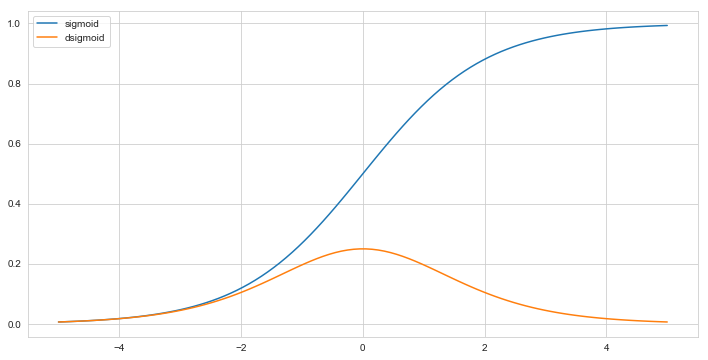

In [73]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
x = np.linspace(-5, 5, 100)
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, dsigmoid(x), label='dsigmoid')
ax.legend(loc='best');

## Logistic Regression

In this section we will implement a logistic regression model trainable with SGD **one sample at a time**.

### Implementation

Complete the `LogisticRegression` class by following these steps (Use the function you write above) :

**Notation** : $x \in \mathbb{R}^N$, $y \in [0,...,K]$, $W \in \mathbb{R}^{K,N}$, $b \in \mathbb{R}^K$


1.  Implement the `forward` function:  
$$y_{pred} = f(x) = softmax(\mathbf{W} x + b)$$

2. Implement the `grad_loss`function which computes the derivative of the loss function (for an for an $x$ and its corresponding expected output $y$) with respect to the parameters of the function$W$ and $b$ :

     $$\frac{d}{dW} [-\log (f(x))_y]$$
     $$\frac{d}{db} [-\log (f(x))_y]$$
    
**Hint**   
    $$\frac{d}{dW_{i,j}} [-\log (f(x))_y] = 
    \begin{cases}
      [f(x)_{y}-1]*x_j, & \text{if}\ i=y \\
      f(x)_{i}*x_j, & \text{otherwise}
    \end{cases}$$
    $$\frac{d}{dW_{i}} [-\log (f(x))_y] = 
    \begin{cases}
      f(x)_{y}-1, & \text{if}\ i=y \\
      f(x)_{i}, & \text{otherwise}
    \end{cases}$$
       

3. Implement the `train` function which uses the grad function output to update $\mathbf{W}$ and $b$ with traditional SGD update without momentum :
$$W = W - \lambda \frac{d}{dW} [-\log (f(x))_y]$$
$$b = b - \lambda \frac{d}{db} [-\log (f(x))_y]$$


In [20]:
class LogisticRegression():

    def __init__(self, input_size, output_size):
        self.W = np.random.uniform(size=(input_size, output_size),
                                   high=0.1, low=-0.1)
        self.b = np.random.uniform(size=output_size,
                                   high=0.1, low=-0.1)
        self.output_size = output_size
        
    def forward(self, X):
        ###
        return sZ
    

    def grad_loss(self, x, y_true):
        ###
        grads = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        ### 
    
        
    def loss(self, x, y):
        nll = NegLogLike(one_hot(self.output_size, y), self.forward(x))
        return nll
    
    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        acc = np.mean(y_preds == y)
        return acc 

IndentationError: expected an indented block (<ipython-input-20-0ff40d51210c>, line 24)

In [23]:
# %load solutions/lr_class

### Evaluate the model without training

In [38]:
# Init the model
lr = LogisticRegression(N, K)

print("Evaluation of the untrained model:")
train_loss = lr.loss(X_train, y_train)
train_acc = lr.accuracy(X_train, y_train)
test_acc = lr.accuracy(X_test, y_test)

print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (train_loss, train_acc, test_acc))

Evaluation of the untrained model:
train loss: 2.5069, train acc: 0.063, test acc: 0.041


Evaluate the randomly initialized model on the first example:

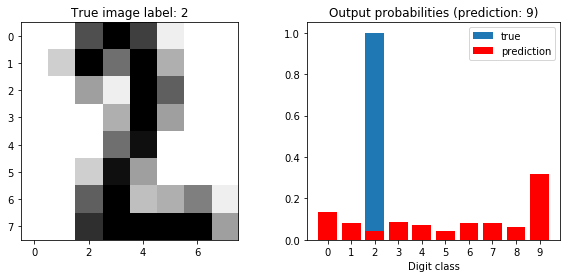

In [39]:
plot_prediction(lr, sample_idx=0)

### Train the model for one epoch

In [40]:
learning_rate = 0.01

for i, (x, y) in enumerate(zip(X_train, y_train)):
    lr.train(x, y, learning_rate)
    if i % 100 == 0:
        train_loss = lr.loss(X_train, y_train)
        train_acc = lr.accuracy(X_train, y_train)
        test_acc = lr.accuracy(X_test, y_test)
        print("Update #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
              % (i, train_loss, train_acc, test_acc))

Update #0, train loss: 2.4696, train acc: 0.064, test acc: 0.048
Update #100, train loss: 1.3526, train acc: 0.682, test acc: 0.689
Update #200, train loss: 0.8824, train acc: 0.849, test acc: 0.859
Update #300, train loss: 0.6519, train acc: 0.895, test acc: 0.896
Update #400, train loss: 0.5399, train acc: 0.902, test acc: 0.904
Update #500, train loss: 0.4682, train acc: 0.913, test acc: 0.915
Update #600, train loss: 0.4095, train acc: 0.919, test acc: 0.930
Update #700, train loss: 0.3722, train acc: 0.933, test acc: 0.941
Update #800, train loss: 0.3505, train acc: 0.934, test acc: 0.956
Update #900, train loss: 0.3256, train acc: 0.932, test acc: 0.952
Update #1000, train loss: 0.3037, train acc: 0.940, test acc: 0.956
Update #1100, train loss: 0.2836, train acc: 0.943, test acc: 0.956
Update #1200, train loss: 0.2718, train acc: 0.947, test acc: 0.959
Update #1300, train loss: 0.2584, train acc: 0.952, test acc: 0.948
Update #1400, train loss: 0.2471, train acc: 0.955, test acc

Evaluate the trained model on the first example:

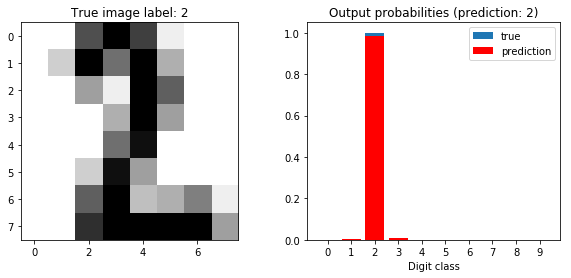

In [41]:
plot_prediction(lr, sample_idx=0)

## Feedforward Multilayer


In this section we will implement a neural network model with one hidden layer using the sigmoid activation.
You will implement the backpropagation algorithm (SGD with the chain rule) 

### Implementation

Complete the `NeuralNet` class following these step

**Notation** : $x \in \mathbb{R}^N$, $h \in \mathbb{R}^H$, $y \in [0,...,K]$, $W^{h} \in \mathbb{R}^{H,N}$, $b^h \in \mathbb{R}^H$, $W^{o} \in \mathbb{R}^{K,H}$, $b^o \in \mathbb{R}^K$


1. Implement `forward` functions for a model with a hidden layer with a sigmoid activation function:
  $$\mathbf{h} = sigmoid(\mathbf{W}^h \mathbf{x} + \mathbf{b^h})$$
  $$\mathbf{y}_{pred} = f(x) = softmax(\mathbf{W}^o \mathbf{h} + \mathbf{b^o})$$

  which return $y$ if *keep_activation* = False and $y$, $h$ and  $\mathbf{W}^h \mathbf{x} + \mathbf{b^h}$ otherwise.

2. 2. Implement the `grad_loss` function which computes the derivative of the loss function (for an for an $x$ and its corresponding expected output $y$) with respect to the parameters of the function $W^h$, $b^h$, $W^o$ and $b^o$ :


In [101]:
# %load solutions/nn_class.py
# %load m2s_solutions/neural_net.py
class NeuralNet():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size):
        self.W_h = np.random.uniform(
            size=(input_size, hidden_size), high=0.01, low=-0.01)
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform(
            size=(hidden_size, output_size), high=0.01, low=-0.01)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size
        
    
    def forward(self, X, keep_activation=False):
        z_h = np.dot(X, self.W_h) + self.b_h
        h = sigmoid(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        rep = [y, h, z_h] if keep_activation else y
        return rep
    
    def loss(self, X, y):
        return NegLogLike(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        y, h, z_h = self.forward(X, keep_activation=True)
        grad_z_o = y - one_hot(self.output_size, y_true)

        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * dsigmoid(z_h)
        grad_W_h = np.outer(X, grad_z_h)
        grad_b_h = grad_z_h
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # Traditional SGD update on one sample at a time
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)


In [99]:
H = 10
model = NeuralNet(N, H, K)

In [92]:
model.loss(X_train, y_train)

2.3025329792525295

In [93]:
model.accuracy(X_train, y_train)

0.10019646365422397

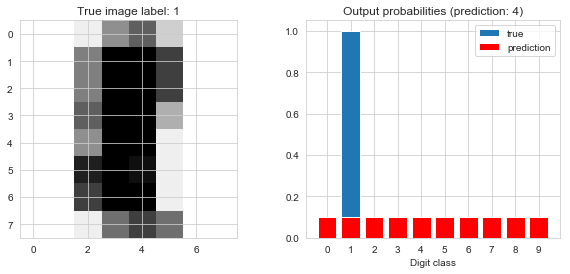

In [94]:
plot_prediction(model, sample_idx=5)

In [95]:
losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.5f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    print("Epoch #%d, train loss: %0.5f, train acc: %0.3f, test acc: %0.3f"
          % (epoch + 1, losses[-1], accuracies[-1], accuracies_test[-1]))

Random init: train loss: 2.30253, train acc: 0.100, test acc: 0.104
Epoch #1, train loss: 0.40034, train acc: 0.881, test acc: 0.848
Epoch #2, train loss: 0.17861, train acc: 0.964, test acc: 0.930
Epoch #3, train loss: 0.11988, train acc: 0.973, test acc: 0.952
Epoch #4, train loss: 0.09491, train acc: 0.979, test acc: 0.959
Epoch #5, train loss: 0.07857, train acc: 0.985, test acc: 0.956
Epoch #6, train loss: 0.06686, train acc: 0.986, test acc: 0.956
Epoch #7, train loss: 0.05713, train acc: 0.988, test acc: 0.956
Epoch #8, train loss: 0.04902, train acc: 0.991, test acc: 0.956
Epoch #9, train loss: 0.04261, train acc: 0.994, test acc: 0.956
Epoch #10, train loss: 0.03752, train acc: 0.995, test acc: 0.959
Epoch #11, train loss: 0.03284, train acc: 0.995, test acc: 0.959
Epoch #12, train loss: 0.02892, train acc: 0.997, test acc: 0.963
Epoch #13, train loss: 0.02547, train acc: 0.998, test acc: 0.963
Epoch #14, train loss: 0.02240, train acc: 0.999, test acc: 0.967
Epoch #15, train 

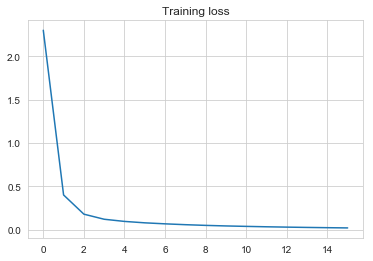

In [96]:
plt.plot(losses)
plt.title("Training loss");

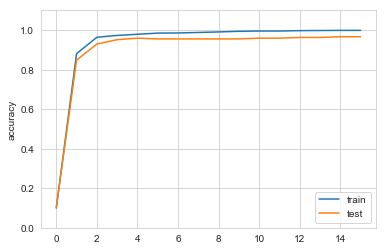

In [97]:
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best');

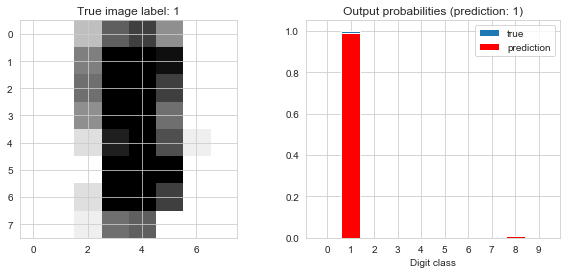

In [98]:
plot_prediction(model, sample_idx=4)

## Exercises

### Look at worst prediction errors

- Use numpy to find test samples for which the model made the worst predictions,
- Use the `plot_prediction` to look at the model predictions on those,
- Would you have done any better?

In [ ]:
# %load solutions/worst_predictions.py

### Hyper parameters settings

- Experiment with different hyper parameters:
  - learning rate,
  - size of hidden layer,
  - initialization scheme: test with 0 initialization vs uniform,
  - implement other activation functions,
  - implement the support for a second hidden layer.


### Mini-batches

- The current implementations of `train` and `grad_loss` function currently only accept a single sample at a time:
    - implement the support for training with a mini-batch of 32 samples at a time instead of one,
    - experiment with different sizes of batches,
    - monitor the norm of the average gradients on the full training set at the end of each epoch.


### Momentum

- Bonus: Implement momentum


### Back to Keras

- Implement the same network architecture with Keras;

- Check that the Keras model can approximately reproduce the behavior of the Numpy model when using similar hyperparameter values (size of the model, type of activations, learning rate value and use of momentum);

- Compute the negative log likelihood of a sample 42 in the test set (can use `model.predict_proba`);

- Compute the average negative log-likelihood on the full test set.

- Compute the average negative log-likelihood  on the full training set and check that you can get the value of the loss reported by Keras.

- Is the model overfitting or underfitting? (ensure that the model has fully converged by increasing the number of epochs to 50 or more if necessary).

In [ ]:
# %load solutions/keras_model.py

In [ ]:
# %load solutions/keras_model_test_loss.py

## Homework assignments

- Watch the following video on [how to code a minimal deep learning framework](https://www.youtube.com/watch?v=o64FV-ez6Gw) that feels like a simplified version
of Keras but using numpy instead of tensorflow:

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("o64FV-ez6Gw")

- **Optional**: read the following blog post on Reverse-Mode Automatic Differentiation from start to section "A simple implementation in Python" included:

  https://rufflewind.com/2016-12-30/reverse-mode-automatic-differentiation